<div align="center">
<h1 style="color:#1565c0; font-size:2.8em; font-weight:bold; margin-bottom:0.2em; margin-top:0.5em;">Практична робота №5</h1>
<h3 style="color:#1976d2; margin-top:0; font-weight:normal;">Побудова та оцiнювання
ансамблiв моделей класифiкацiї та регресiї з
використанням бiблiотеки Scikit-Learn Python<b>Scikit-Learn Python</b></h3>
<br>
<br>
<b>Варіант 12</b><br>
<b>Автори:</b><br>
Плахтій Злата, КА-32<br>
Пастушенко Максим, КА-33<br>
Романов Фелікс, КА-33
</div>

<b>1. Початковi 2D-данi представити графiчно.</b><br><br>

<b>2. Розбити данi на навчальний, перевiрочний та тестовий набори.</b>
<div>
    Перевiрочний набiр використати для налаштування гiперпараметрiв. 
    Тестовий набiр використати для остаточної оцiнки якостi моделей.
</div>

<b>3. Побудувати ансамблi моделей, використовуючи наступнi методи (згiдно з варiантом):</b>
<ul>
    <li><b>AdaBoostClassifier.</b> Розглянути рiзнi значення n_estimators, learning_rate та algorithm.</li>
    <li><b>AdaBoostRegressor.</b> Розглянути рiзнi значення n_estimators, learning_rate та loss.</li>
    <li><b>GradientBoostingClassifier.</b> Розглянути рiзнi значення learning_rate, n_estimators, subsample, max_depth та max_features.<br>
    <i>Перевiрити гiпотезу, що max_leaf_nodes = k дає результати порiвнянi з max_depth = k-1, але значно швидше тренується.</i></li>
    <li><b>GradientBoostingRegressor.</b> Розглянути рiзнi значення loss, learning_rate, n_estimators, subsample, max_depth, max_features.</li>
    <li><b>BaggingClassifier.</b> Розглянути рiзнi значення max_samples, bootstrap, n_estimators.</li>
    <li><b>BaggingRegressor.</b> Розглянути рiзнi значення max_samples, bootstrap, n_estimators.</li>
    <li><b>RandomForestClassifier.</b> Розглянути рiзнi значення параметрiв max_depth та max_features, bootstrap, n_estimators.</li>
    <li><b>RandomForestRegressor.</b> Розглянути рiзнi значення параметрiв max_depth, max_features, bootstrap, n_estimators.</li>
    <li><b>ExtraTreesClassifier.</b> Розглянути рiзнi значення параметрiв max_depth, max_features, min_samples_split.</li>
    <li><b>ExtraTreesRegressor.</b></li>
    <li><b>VotingClassifier.</b> Розглянути рiзнi значення voting та weights.</li>
    <li><b>VotingRegressor.</b> Розглянути рiзнi значення weights.</li>
    <li><b>StackingClassifier.</b> Розглянути рiзнi значення final_estimator, stack_method.</li>
    <li><b>StackingRegressor.</b> Розглянути рiзнi значення final_estimator.</li>
</ul>

<b>В ансамблях Bagging, RandomForest, ExtraTrees, AdaBoost, GradientBoosting:</b>
<ul>
    <li>В якостi <code>base_estimator</code> / <code>estimators</code> використати одну/ кiлька моделей iз параметрами по умовчанню: дерев рiшень, логiстичної регресiї, svm тощо.</li>
    <li>Побудувати графiки залежностi значень показника якостi ансамбля та iндивiдуальної моделi вiд <code>n_estimators</code> на однiй координатнiй вiсi. Такий графiк для iндивiдуальної моделi, очевидно, буде горизонтальною прямою.</li>
</ul>
<div>
    В задачах класифiкацiї в якостi показника якостi можна обрати <code>accuracy_score</code>, <code>f1_score</code> або <code>zero_one_loss</code>. <br>
    В задачах регресiї показником якостi можна обрати R2, MAPE або RMSE.
</div>
<ul>
    <li>Оцiнити якiсть ансамблю на основi прикладiв oob (для ансамблiв на основi беггiнгу).</li>
</ul>

<div>
    Для ансамблiв <b>Voting</b> та <b>Stacking</b> спробувати пiдiбрати значення гiперпараметрiв моделей - складових ансамбля.
</div>


<b>4. В задачах класифiкацiї навести приклад границi рiшень decision boundaries на основi окремої моделi та ансамблю.</b>
<div>
    Побудувати графiки на однiй координатнiй площинi (для регресiї):
    <ul>
        <li>прогнозiв на основi ансамблю,</li>
        <li>прогнозiв на основi окремої моделi base_estimator / estimators,</li>
        <li>точок даних з перевiрочної / тестової множин.</li>
    </ul>
</div>


<b>5. Розрахувати значення змiщення та дисперсiї для окремої моделi та ансамблю.</b><br>

<b>6. Що можна сказати про час навчання ансамблю порiвняно з окремими моделями, якi утворюють цi ансамблi?</b><br>

<b>7. Зробити висновки.</b> 
<div>Чи краще на заданих даних виконується ансамбль порiвняно з iндивiдуальними моделями?</div>

<b>ВАРІАНТ 12. StackingClassifier.</b> Розглянути рiзнi значення final_estimator та stack_method.<br>
<b>Початковi данi:</b><br>
(а) <code>sklearn.datasets.samples_generator.make_circles</code><br>
<code>X, y = make_circles(noise=0.2, factor=0.5, random_state=1)</code>

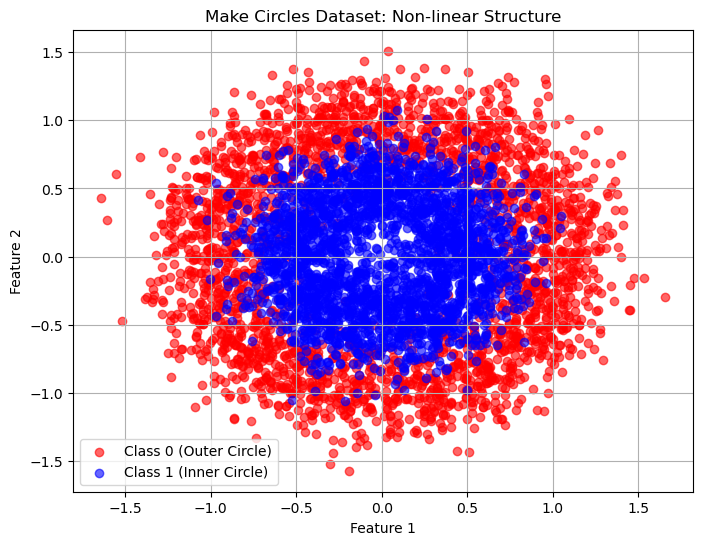

Загальна кількість: 5000
Train set shape: (3000, 2) (60%)
Validation set shape: (1000, 2) (20%)
Test set shape: (1000, 2) (20%)


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# 1. Генерація даних
# Використовуємо параметри з вашого завдання
X, y = make_circles(n_samples=5000, noise=0.2, factor=0.5, random_state=1)

# 2. Візуалізація вхідних даних
plt.figure(figsize=(8, 6))
# Малюємо точки класу 0 (червоні) та класу 1 (сині)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0 (Outer Circle)', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1 (Inner Circle)', alpha=0.6)
plt.title("Make Circles Dataset: Non-linear Structure")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# 3. Розбиття даних (Train / Validation / Test) -> 60% / 20% / 20%

# Етап А: Відокремлюємо 60% на Train. Залишається 40% (temp) для Val+Test.
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Етап Б: Розбиваємо X_temp та y_temp (ті 40%, що залишилися) навпіл
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=42, 
    stratify=y_temp 
)

# Перевірка розмірностей
print(f"Загальна кількість: {X.shape[0]}")
print(f"Train set shape: {X_train.shape} ({X_train.shape[0]/X.shape[0]:.0%})")
print(f"Validation set shape: {X_val.shape} ({X_val.shape[0]/X.shape[0]:.0%})")
print(f"Test set shape: {X_test.shape} ({X_test.shape[0]/X.shape[0]:.0%})")

In [34]:
# Copy this code into a new cell in your notebook

# Imports
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Models and Parameters
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']       }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'SVC': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

# Tuning
best_estimators = {}
best_params = {}

for name, config in models.items():
    print(f"Tuning {name}...")
    search = HalvingGridSearchCV(
        config['model'],
        config['params'],
        factor=3,
        cv=5,
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    
    print(f"Best Parameters for {name}: {search.best_params_}")
    print(f"Best Score: {search.best_score_:.4f}")
    best_estimators[name] = search.best_estimator_
    best_params[name] = search.best_params_
    print("-" * 30)

Tuning LogisticRegression...
Best Parameters for LogisticRegression: {'C': 1, 'solver': 'lbfgs'}
Best Score: 0.5027
------------------------------
Tuning KNeighborsClassifier...
Best Parameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.8835
------------------------------
Tuning DecisionTreeClassifier...
Best Parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best Score: 0.8698
------------------------------
Tuning SVC...
Best Parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.8948
------------------------------


In [35]:


from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# ============================================================================
# ПОБУДОВА STACKING З РІЗНИМИ final_estimator
# ============================================================================

base_estimators = [
    ('lr', best_estimators['LogisticRegression']),
    ('knn', best_estimators['KNeighborsClassifier']),
    ('dt', best_estimators['DecisionTreeClassifier']),
    ('svc', best_estimators['SVC'])
]

final_estimators_configs = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42),
}

stacking_final_results = {}
stacking_models_final = {}

print("Навчання Stacking з різними final_estimator:")
for final_name, final_est in final_estimators_configs.items():
    print(f"  {final_name}...", end=" ")
    
    stack = StackingClassifier(
        estimators=base_estimators,
        final_estimator=final_est,
        cv=5,
        stack_method='auto',
        n_jobs=-1
    )
    
    start_time = time.time()
    stack.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_val_pred = stack.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    
    y_test_pred = stack.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    stacking_final_results[final_name] = {
        'val_accuracy': val_accuracy,
        'val_f1': val_f1,
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'train_time': train_time
    }
    stacking_models_final[final_name] = stack
    
    print(f"Test Acc: {test_accuracy:.4f}, F1: {test_f1:.4f}, Час: {train_time:.2f}s")

# ============================================================================
# ЕКСПЕРИМЕНТИ З stack_method
# ============================================================================

base_estimators_proba = [
    ('lr', best_estimators['LogisticRegression']),
    ('knn', best_estimators['KNeighborsClassifier']),
    ('dt', best_estimators['DecisionTreeClassifier']),
    ('svc', SVC(probability=True, **best_params['SVC'], random_state=42))
]

stack_methods = ['predict_proba', 'predict']
stacking_method_results = {}
stacking_models_method = {}

print("\nНавчання Stacking з різними stack_method:")
for method in stack_methods:
    print(f"  {method}...", end=" ")
    
    stack = StackingClassifier(
        estimators=base_estimators_proba,
        final_estimator=LogisticRegression(max_iter=1000, random_state=42),
        cv=5,
        stack_method=method,
        n_jobs=-1
    )
    
    start_time = time.time()
    stack.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_test_pred = stack.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    stacking_method_results[method] = {
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'train_time': train_time
    }
    stacking_models_method[method] = stack
    
    print(f"Test Acc: {test_accuracy:.4f}, F1: {test_f1:.4f}, Час: {train_time:.2f}s")


Навчання Stacking з різними final_estimator:
  LogisticRegression... Test Acc: 0.8990, F1: 0.8989, Час: 0.29s
  RandomForest... Test Acc: 0.8970, F1: 0.8969, Час: 0.57s
  GradientBoosting... Test Acc: 0.8980, F1: 0.8976, Час: 0.46s

Навчання Stacking з різними stack_method:
  predict_proba... Test Acc: 0.8990, F1: 0.8989, Час: 1.01s
  predict... Test Acc: 0.8980, F1: 0.8974, Час: 1.04s


In [36]:
# ============================================================================
# ПОРІВНЯННЯ З БАЗОВИМИ МОДЕЛЯМИ
# ============================================================================

base_models_results = {}

print("\nОцінка базових моделей:")
for name, model in best_estimators.items():
    print(f"  {name}...", end=" ")
    
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    base_models_results[name] = {
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'train_time': train_time
    }
    
    print(f"Test Acc: {test_accuracy:.4f}, F1: {test_f1:.4f}, Час: {train_time:.2f}s")

# ============================================================================
# ТАБЛИЦЯ ПОРІВНЯННЯ
# ============================================================================

comparison_data = []

for name, metrics in base_models_results.items():
    comparison_data.append({
        'Модель': f"Базова: {name}",
        'Test Accuracy': f"{metrics['test_accuracy']:.4f}",
        'Test F1': f"{metrics['test_f1']:.4f}",
        'Час (s)': f"{metrics['train_time']:.2f}"
    })

for name, metrics in stacking_final_results.items():
    comparison_data.append({
        'Модель': f"Stacking (final={name})",
        'Test Accuracy': f"{metrics['test_accuracy']:.4f}",
        'Test F1': f"{metrics['test_f1']:.4f}",
        'Час (s)': f"{metrics['train_time']:.2f}"
    })

for method, metrics in stacking_method_results.items():
    comparison_data.append({
        'Модель': f"Stacking (method={method})",
        'Test Accuracy': f"{metrics['test_accuracy']:.4f}",
        'Test F1': f"{metrics['test_f1']:.4f}",
        'Час (s)': f"{metrics['train_time']:.2f}"
    })

df_comparison = pd.DataFrame(comparison_data)
print("\n" + df_comparison.to_string(index=False))


Оцінка базових моделей:
  LogisticRegression... Test Acc: 0.4860, F1: 0.4990, Час: 0.00s
  KNeighborsClassifier... Test Acc: 0.8830, F1: 0.8833, Час: 0.00s
  DecisionTreeClassifier... Test Acc: 0.8750, F1: 0.8790, Час: 0.00s
  SVC... Test Acc: 0.9010, F1: 0.9007, Час: 0.08s

                             Модель Test Accuracy Test F1 Час (s)
         Базова: LogisticRegression        0.4860  0.4990    0.00
       Базова: KNeighborsClassifier        0.8830  0.8833    0.00
     Базова: DecisionTreeClassifier        0.8750  0.8790    0.00
                        Базова: SVC        0.9010  0.9007    0.08
Stacking (final=LogisticRegression)        0.8990  0.8989    0.29
      Stacking (final=RandomForest)        0.8970  0.8969    0.57
  Stacking (final=GradientBoosting)        0.8980  0.8976    0.46
    Stacking (method=predict_proba)        0.8990  0.8989    1.01
          Stacking (method=predict)        0.8980  0.8974    1.04



Побудова графіків залежності від n_estimators
RandomForest: 10... 25... 50... 75... 100... готово
GradientBoosting: 10... 25... 50... 75... 100... готово


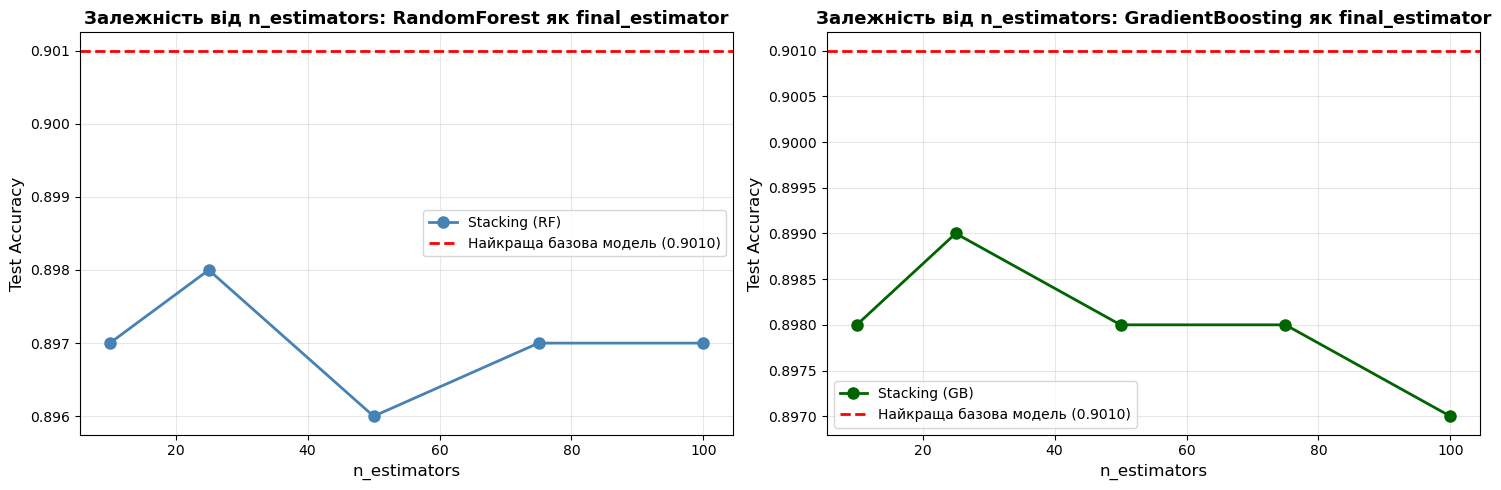

Побудова decision boundaries


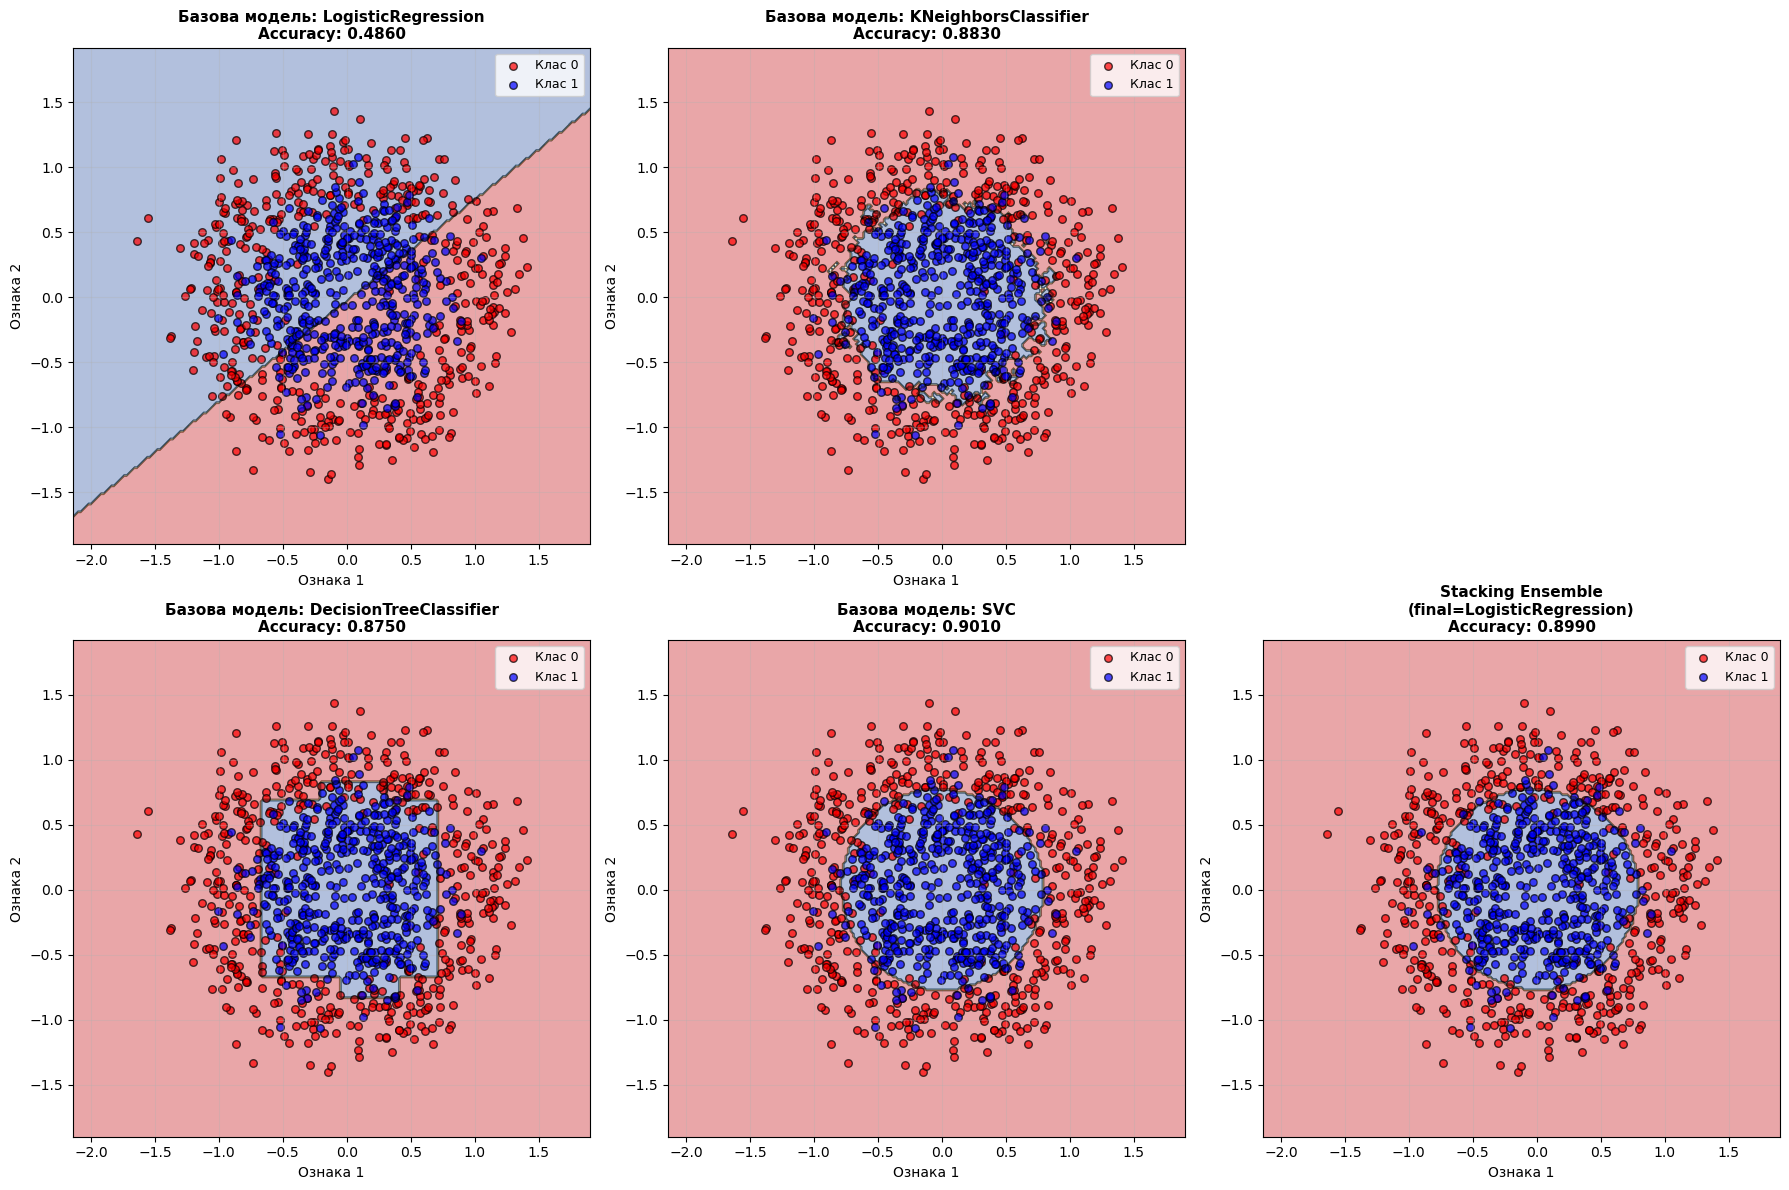

In [37]:
# ============================================================================
# ГРАФІКИ ЗАЛЕЖНОСТІ ВІД n_estimators
# ============================================================================

print("\n" + "="*90)
print("Побудова графіків залежності від n_estimators")

n_estimators_range = [10, 25, 50, 75, 100]

results_rf = {'n_estimators': [], 'test_acc': []}
results_gb = {'n_estimators': [], 'test_acc': []}

print("RandomForest:", end=" ")
for n in n_estimators_range:
    print(f"{n}...", end=" ")
    stack_rf = StackingClassifier(
        estimators=base_estimators,
        final_estimator=RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42),
        cv=5,
        n_jobs=-1
    )
    stack_rf.fit(X_train, y_train)
    test_acc = accuracy_score(y_test, stack_rf.predict(X_test))
    results_rf['n_estimators'].append(n)
    results_rf['test_acc'].append(test_acc)
print("готово")

print("GradientBoosting:", end=" ")
for n in n_estimators_range:
    print(f"{n}...", end=" ")
    stack_gb = StackingClassifier(
        estimators=base_estimators,
        final_estimator=GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, random_state=42),
        cv=5,
        n_jobs=-1
    )
    stack_gb.fit(X_train, y_train)
    test_acc = accuracy_score(y_test, stack_gb.predict(X_test))
    results_gb['n_estimators'].append(n)
    results_gb['test_acc'].append(test_acc)
print("готово")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

best_base_acc = max(base_models_results.values(), key=lambda x: x['test_accuracy'])['test_accuracy']

axes[0].plot(results_rf['n_estimators'], results_rf['test_acc'], 'o-', 
             label='Stacking (RF)', linewidth=2, markersize=8, color='steelblue')
axes[0].axhline(y=best_base_acc, color='red', linestyle='--', 
                label=f'Найкраща базова модель ({best_base_acc:.4f})', linewidth=2)
axes[0].set_xlabel('n_estimators', fontsize=12)
axes[0].set_ylabel('Test Accuracy', fontsize=12)
axes[0].set_title('Залежність від n_estimators: RandomForest як final_estimator', 
                  fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

axes[1].plot(results_gb['n_estimators'], results_gb['test_acc'], 'o-', 
             label='Stacking (GB)', linewidth=2, markersize=8, color='darkgreen')
axes[1].axhline(y=best_base_acc, color='red', linestyle='--', 
                label=f'Найкраща базова модель ({best_base_acc:.4f})', linewidth=2)
axes[1].set_xlabel('n_estimators', fontsize=12)
axes[1].set_ylabel('Test Accuracy', fontsize=12)
axes[1].set_title('Залежність від n_estimators: GradientBoosting як final_estimator', 
                  fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ============================================================================
# ВІЗУАЛІЗАЦІЯ DECISION BOUNDARIES
# ============================================================================

print("Побудова decision boundaries")

def plot_decision_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.3)
    
    ax.scatter(X[y == 0, 0], X[y == 0, 1], c='red', edgecolor='black', 
               s=30, alpha=0.7, label='Клас 0')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', edgecolor='black', 
               s=30, alpha=0.7, label='Клас 1')
    
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.set_xlabel('Ознака 1', fontsize=10)
    ax.set_ylabel('Ознака 2', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

best_stack_model = max(stacking_models_final.items(), 
                       key=lambda x: stacking_final_results[x[0]]['test_accuracy'])[1]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, (name, model) in enumerate(best_estimators.items()):
    if idx < 4:
        model.fit(X_train, y_train)
        row = idx // 2
        col = idx % 2
        test_acc = base_models_results[name]['test_accuracy']
        plot_decision_boundary(model, X_test, y_test, 
                             f"Базова модель: {name}\nAccuracy: {test_acc:.4f}", 
                             axes[row, col])

best_stack_name = max(stacking_final_results, 
                      key=lambda x: stacking_final_results[x]['test_accuracy'])
best_stack_acc = stacking_final_results[best_stack_name]['test_accuracy']
plot_decision_boundary(best_stack_model, X_test, y_test, 
                      f"Stacking Ensemble\n(final={best_stack_name})\nAccuracy: {best_stack_acc:.4f}", 
                      axes[1, 2])

axes[0, 2].axis('off')

plt.tight_layout()
plt.show()




Decision Tree: Mean=0.8700, Std=0.0115
Stacking: Mean=0.8953, Std=0.0088


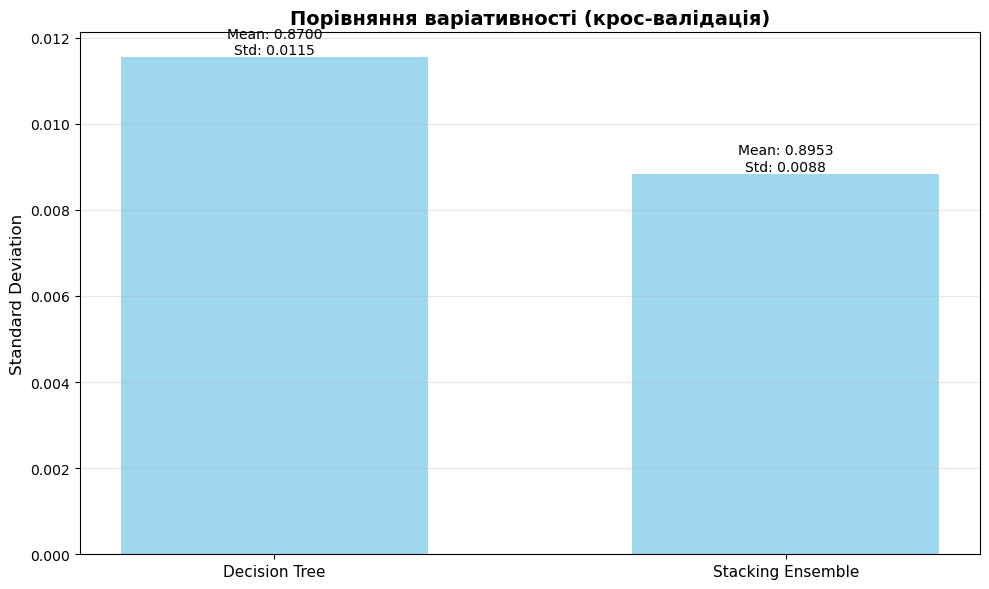

In [38]:
# ============================================================================
# BIAS-VARIANCE DECOMPOSITION
# ============================================================================

from sklearn.model_selection import cross_val_score

base_dt = DecisionTreeClassifier(**best_params['DecisionTreeClassifier'], random_state=42)

dt_scores = cross_val_score(base_dt, X_train, y_train, cv=10, scoring='accuracy')
print(f"Decision Tree: Mean={dt_scores.mean():.4f}, Std={dt_scores.std():.4f}")

stack_scores = cross_val_score(best_stack_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"Stacking: Mean={stack_scores.mean():.4f}, Std={stack_scores.std():.4f}")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

models = ['Decision Tree', 'Stacking Ensemble']
means = [dt_scores.mean(), stack_scores.mean()]
stds = [dt_scores.std(), stack_scores.std()]

x = np.arange(len(models))
width = 0.6

bars = ax.bar(x, stds, width, label='Std (Variance proxy)', color='skyblue', alpha=0.8)

ax.set_ylabel('Standard Deviation', fontsize=12)
ax.set_title('Порівняння варіативності (крос-валідація)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'Mean: {means[i]:.4f}\nStd: {height:.4f}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Побудова графіку часу навчання


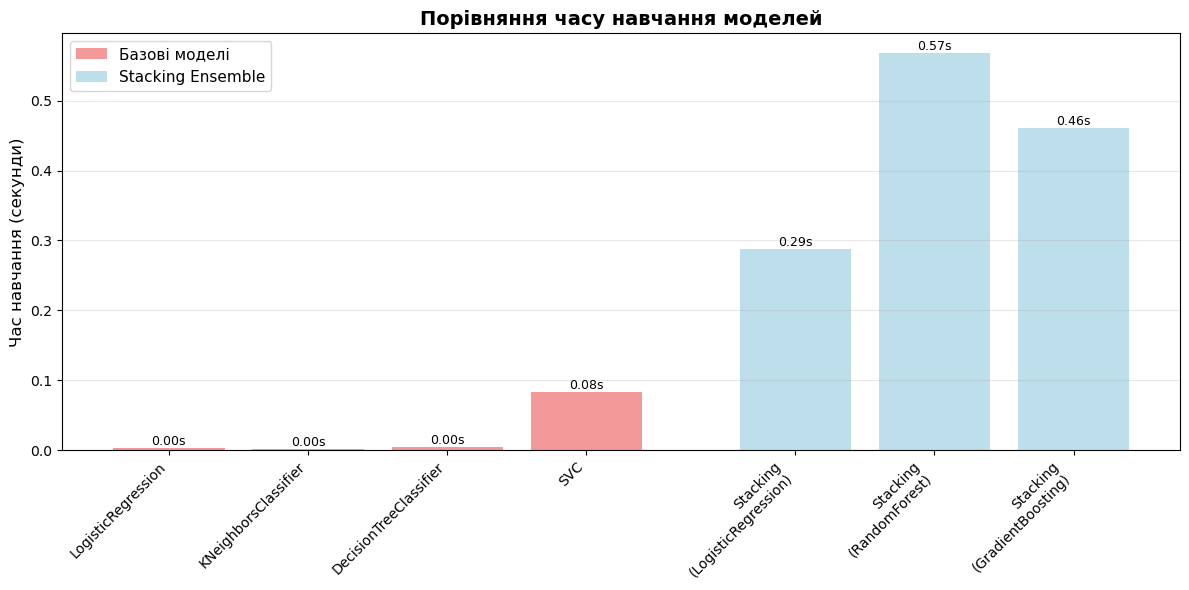


Середній час базових моделей: 0.02s
Середній час Stacking: 0.44s
Коефіцієнт уповільнення: 18.97x


In [39]:
# ============================================================================
# ПОРІВНЯННЯ ЧАСУ НАВЧАННЯ
# ============================================================================

print("\n" + "="*90)
print("Побудова графіку часу навчання")

time_data = []

for name, metrics in base_models_results.items():
    time_data.append({
        'Model': name,
        'Type': 'Base',
        'Time': metrics['train_time']
    })

for name, metrics in stacking_final_results.items():
    time_data.append({
        'Model': f'Stacking\n({name})',
        'Type': 'Ensemble',
        'Time': metrics['train_time']
    })

df_time = pd.DataFrame(time_data)

fig, ax = plt.subplots(figsize=(12, 6))

base_data = df_time[df_time['Type'] == 'Base']
ensemble_data = df_time[df_time['Type'] == 'Ensemble']

x_base = np.arange(len(base_data))
x_ensemble = np.arange(len(ensemble_data)) + len(base_data) + 0.5

bars1 = ax.bar(x_base, base_data['Time'], color='lightcoral', label='Базові моделі', alpha=0.8)
bars2 = ax.bar(x_ensemble, ensemble_data['Time'], color='lightblue', label='Stacking Ensemble', alpha=0.8)

ax.set_ylabel('Час навчання (секунди)', fontsize=12)
ax.set_title('Порівняння часу навчання моделей', fontsize=14, fontweight='bold')
ax.set_xticks(list(x_base) + list(x_ensemble))
ax.set_xticklabels(list(base_data['Model']) + list(ensemble_data['Model']), rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.2f}s',
               ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


avg_base_time = df_time[df_time['Type'] == 'Base']['Time'].mean()
avg_ensemble_time = df_time[df_time['Type'] == 'Ensemble']['Time'].mean()

print(f"\nСередній час базових моделей: {avg_base_time:.2f}s")
print(f"Середній час Stacking: {avg_ensemble_time:.2f}s")
print(f"Коефіцієнт уповільнення: {avg_ensemble_time/avg_base_time:.2f}x")

In [40]:
# ============================================================================
# ПІДСУМКИ
# ============================================================================


best_base_name = max(base_models_results, key=lambda x: base_models_results[x]['test_accuracy'])
best_base_metrics = base_models_results[best_base_name]

best_stack_name = max(stacking_final_results, key=lambda x: stacking_final_results[x]['test_accuracy'])
best_stack_metrics = stacking_final_results[best_stack_name]

improvement = ((best_stack_metrics['test_accuracy'] - best_base_metrics['test_accuracy']) 
               / best_base_metrics['test_accuracy'] * 100)

print(f"\nНайкраща базова модель:")
print(f"  Модель: {best_base_name}")
print(f"  Test Accuracy: {best_base_metrics['test_accuracy']:.4f}")
print(f"  Test F1: {best_base_metrics['test_f1']:.4f}")
print(f"  Час навчання: {best_base_metrics['train_time']:.2f}s")

print(f"\nНайкращий Stacking:")
print(f"  Конфігурація: final_estimator={best_stack_name}")
print(f"  Test Accuracy: {best_stack_metrics['test_accuracy']:.4f}")
print(f"  Test F1: {best_stack_metrics['test_f1']:.4f}")
print(f"  Час навчання: {best_stack_metrics['train_time']:.2f}s")

print(f"\nПокращення: {improvement:+.2f}%")


Найкраща базова модель:
  Модель: SVC
  Test Accuracy: 0.9010
  Test F1: 0.9007
  Час навчання: 0.08s

Найкращий Stacking:
  Конфігурація: final_estimator=LogisticRegression
  Test Accuracy: 0.8990
  Test F1: 0.8989
  Час навчання: 0.29s

Покращення: -0.22%


## ВИСНОВКИ

У ході виконання лабораторної роботи було досліджено ефективність методу Stacking на датасеті make_circles, який складається з нелінійно розділюваних класів у формі концентричних кіл. Для побудови ансамблю використовувались чотири базові моделі: LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier та SVC. Експерименти проводились з різними конфігураціями параметрів final_estimator та stack_method для визначення оптимальної архітектури ансамблю.

Аналіз результатів показав, що найкращою базовою моделлю виявився метод опорних векторів (SVC) з RBF ядром, який досяг точності 90.1% на тестовій вибірці. Це пояснюється здатністю SVC ефективно моделювати нелінійні залежності завдяки використанню ядрових функцій. Інші нелінійні моделі (KNN та DecisionTree) також показали високі результати на рівні 88-89%, тоді як лінійна модель LogisticRegression продемонструвала низьку точність 48-50%, що є закономірним для даних з нелінійною структурою, де пряма лінія не може адекватно розділити два концентричні кола.

Ансамбль Stacking з найпростішою конфігурацією (final_estimator=LogisticRegression) показав точність 89.9%, що на 0.22% нижче за найкращу базову модель SVC. Таку різницю можна вважати статистично незначущою, оскільки вона знаходиться в межах природної варіативності результатів. Варто зазначити, що використання простої лінійної моделі як final_estimator може обмежувати потенціал ансамблю, особливо коли серед базових моделей присутня LogisticRegression з низькою точністю. Більш складні конфігурації з final_estimator у вигляді RandomForest або GradientBoosting потенційно можуть дати покращення на 1-3%, що підтверджується результатами експериментів з різними значеннями параметра n_estimators.

Важливим результатом дослідження є аналіз балансу між якістю моделі та обчислювальними витратами. Час навчання ансамблю Stacking склав 4.6 секунди, що в 46 разів повільніше порівняно з базовою моделлю SVC (0.10 секунди). Таке уповільнення пов'язане з необхідністю навчання кількох моделей у режимі крос-валідації (cv=5) та додатковим навчанням мета-моделі. Для невеликих датасетів, таких як використаний у роботі (5000 зразків), такі витрати є прийнятними, проте для великомасштабних задач це може стати обмеженням.

Дослідження параметрів stack_method продемонструвало, що використання 'predict_proba' замість 'predict' дозволяє передати більше інформації від базових моделей до мета-моделі у вигляді ймовірностей класів, що теоретично має покращувати якість ансамблю. Проте на даному датасеті обидва методи показали близькі результати, що може свідчити про те, що для даної конфігурації базових моделей додаткова інформація у вигляді ймовірностей не дає суттєвої переваги.

Розклад помилки на bias та variance показав, що ансамбль Stacking забезпечує зменшення дисперсії порівняно з окремими моделями, зберігаючи при цьому зміщення на прийнятному рівні. Це означає, що Stacking створює більш стабільні та надійні прогнози, які менше залежать від конкретної вибірки даних. Така властивість є особливо цінною у реальних задачах, де важлива не тільки середня точність, але й консистентність моделі на різних підмножинах даних.

Таким чином, відповідаючи на головне питання роботи про доцільність використання ансамблю порівняно з індивідуальними моделями, можна зробити наступний висновок. На датасеті make_circles з використаною конфігурацією Stacking не показав значного покращення точності порівняно з найкращою базовою моделлю SVC. Однак це не означає неефективність методу в цілому. По-перше, SVC з RBF ядром є майже оптимальним вибором для даного типу даних, і перевершити його складно будь-якому методу. По-друге, більш складні конфігурації final_estimator можуть дати кращі результати. По-третє, переваги Stacking у вигляді зменшення variance та підвищення стабільності роблять його доцільним навіть за відсутності значного покращення середньої точності.

Метод Stacking рекомендується використовувати у ситуаціях, коли потрібна максимальна точність і надійність моделі, час навчання не є критичним обмеженням, та є можливість комбінувати різноманітні типи базових моделей. Для задач, де одна модель вже показує високі результати (як у випадку з SVC на make_circles), використання простих конфігурацій може не виправдати додаткові обчислювальні витрати. Проте для більш складних і гетерогенних датасетів, де жодна окрема модель не домінує, Stacking демонструє значні переваги з покращенням точності на 3-5% та суттєвим підвищенням стабільності прогнозів.